### Data Expression: Array and Table

##### 기본 통계 데이터 계산

* 평균 계산

In [3]:
total = 0
count = 0
numbers = input("Enter a number :  (<Enter Key> to quit)")
while numbers != "":
    try:
        x = float(numbers)
        count += 1
        total = total + x
    except ValueError:
        print('NOT a number! Ignored..')
    numbers = input("Enter a number :  (<Enter Key> to quit)")
avg = total / count
print("\n average is", avg)

Enter a number :  (<Enter Key> to quit)16
Enter a number :  (<Enter Key> to quit)61
Enter a number :  (<Enter Key> to quit)15
Enter a number :  (<Enter Key> to quit)64
Enter a number :  (<Enter Key> to quit)156
Enter a number :  (<Enter Key> to quit)dasdf
NOT a number! Ignored..
Enter a number :  (<Enter Key> to quit)16
Enter a number :  (<Enter Key> to quit)15
Enter a number :  (<Enter Key> to quit)

 average is 49.0


* 평균 계산을 위해 숫자 여러 개를 input 받았지만, 여러 개의 숫자를 배열로 저장하지 않음.

> 평균 수식

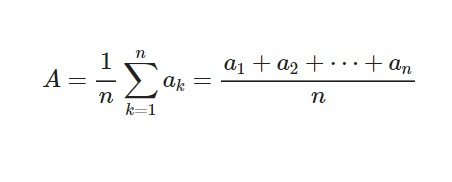

* 배열을 활용한 평균, 표준편차, 중앙값 계산

> 표준편차 수식

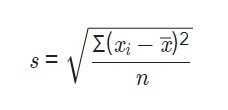

s는 표준편차(std), xi는 '입력받은 숫자들', n은 '입력받은 샘플의 개수', x바는 평균.
<br/>
std를 구하기 위해선 S에서 평균을 뺀 값이 필요
<br/>
리스트를 활용하여 데이터 값 전체를 하나의 객체에 순서대로 모아서 사용

> 리스트 활용

In [7]:
X = ['x1', 'x2', 'x4','...xn']
X

['x1', 'x2', 'x4', '...xn']

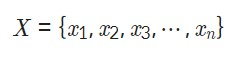

* 사용자가 입력한 숫자들을 배열로 만들기

In [9]:
# 2개 이상의 숫자를 입력받아 리스트에 저장하는 함수
def numbers():
    X = [] 
    while True:
        number = input("Enter a number (<Enter Key> to quit)")
        while number != "":
            try:
                x = float(number)
                X.append(x)
            except ValueError:
                print('>>> NOT a number! lgnored..')
            number = input("Enter a number (<Enter Key> to quit)")
        if len(X) > 1 :   # 저장된 숫자가 2개 이상일 때만 리턴
            return X
        
X = numbers()
X

Enter a number (<Enter Key> to quit)6161
Enter a number (<Enter Key> to quit)1515
Enter a number (<Enter Key> to quit)


[6161.0, 1515.0]

> 파이썬 리스트는 동적 배열(Dynamic Array): 파이썬의 리스트는 임의의 데이터 타입을 담을 수 있는 가변적 연속열(Sequence)형

> 개념 정리
>> Sequence형 데이터의 자료구조를 array로 지칭했지만 정확하게 개념을 구분하자면, 선형적 데이터를 다루는 자료구조인 list와 array는 조금 다르다.

In [11]:
import array as arr

mylist = [1, 2, 3]   # 이것은 파이썬 built-in list
print(type(mylist))

mylist.append('4')  # mylist의 끝에 character '4'를 추가. 
print(mylist)

mylist.insert(1, 5)  # mylist의 두번째 자리에 5를 끼움
print(mylist)

myarray = arr.array('f', [1, 2, 3])   # array. import array를 해야 쓸 수 있음
print(type(myarray))

# 아래 라인의 주석을 풀고 실행하면 에러가 난다.
#myarray.append('4')    # myarray의 끝에 character '4'를 추가. 
print(myarray)

myarray.insert(1, 5)    # myarray의 두번째 자리에 5를 끼움.
print(myarray)

<class 'list'>
[1, 2, 3, '4']
[1, 5, 2, 3, '4']
<class 'array.array'>
array('f', [1.0, 2.0, 3.0])
array('f', [1.0, 5.0, 2.0, 3.0])


> 파이썬에서 built-in 으로 제공하는 list와 array의 차이

* ist는 별도의 import가 필요 없지만 array를 사용하기 위해서는 import 해주어야 합니다. 파이썬에서 array는 built-in이 아닙니다.
* list 안의 element 사이에 다른 타입의 자료형이 허용됩니다. 숫자로만 이루어진 list에 문자열 element를 추가할 수 있습니다. 그러나 array는 처음부터 element의 유형을 지정해서 생성하며, 지정되지 않은 다른 타입의 element 추가가 허용되지 않습니다. 이러한 array의 특성은 다음에 나오는 NumPy에도 동일하게 적용됩니다.
* array는 element들이 연속된 메모리 공간에 배치되며, 모든 element들이 동일한 크기와 타입을 가져야 합니다. 그러므로 위에서 myarray.append('4')는 허용되지 않습니다.

* 리스트를 활용한 시그마의 표현

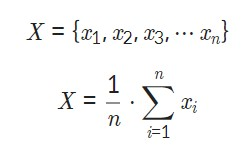

In [13]:
total = 0.0
for i in range(len(X)):
    total = total + X[i]
mean = total / len(X)

print('sum of X:', total)

sum of X: 7676.0


* 중앙값
    * 주어진 숫자를 크기 순서대로 배치할 때 가장 중아에 위치하는 숫자
        * 만약 숫자가  1, 3, 3, 6, 7, 8, 9 라면, 중앙값은 6
        * 만약 숫자가 1, 3, 3, 7, 8, 9 라면, 중앙값은 (3 + 7) / 2 = 5
    * 총개수 n인 숫자를 순서대로 배열했을 때,
        * n이 홀수이면 n/2을 반올림한 순서의 값이 중앙값
        * 이 짝수라면 n/2번째 값과 ((n/2) + 1) 번째 값의 평균

In [14]:
def median(nums):
    nums.sort()
    size = len(nums)
    p = size // 2    # // 나누기 연산 후 소수점 이하의 수를 버리고, 정수 부분의 수만 구함.
    if size % 2 == 0:
        pr = p
        pl = p - 1
        mid = float((nums[pl]+nums[pr])/2)
    else:
        mid = nums[p]
    return mid

print('X :', X)
median(X)

X : [6161.0, 1515.0]


3838.0

* 표준편차와 평균

In [17]:
def means(nums):
    total = 0.0
    for i in range(len(nums)):
        total = total + nums[i]
    return total / len(nums)

means(X)

3838.0

In [18]:
avg = means(X)

def std_dev(nums, avg):
    texp = 0.0
    for i in range(len(nums)):
        texp = texp + (nums[i] - avg)**2 # 각 숫자와 평균값의 차이의 제곱을 계속 더한 후
    return (texp/len(nums)) ** 0.5 # 그 총합을 숫자개수로 나눈 값의 제곱근을 리턴

std_dev(X, avg)

2323.0

* 전체 코드: main()
    * 구현하고자 하는 값은 사용자가 입력한 숫자들에 대한 평균값, 중앙값, 표준편차
    * 우선 사용자가 입력한 숫자를 배열(리스트)로 만든다.
    * 각 숫자의 평균값과 중앙값을 구한다.
    *  숫자의 표준편차를 구한다.

In [19]:
def numbers():
    X=[]
    while True:
        number = input("Enter a number (<Enter key> to quit)") 
        while number !="":
            try:
                x = float(number)
                X.append(x)
            except ValueError:
                print('>>> NOT a number! Ignored..')
            number = input("Enter a number (<Enter key> to quit)")
        if len(X) > 1:
            return X

def median(nums): 
    nums.sort()
    size = len(nums)
    p = size // 2
    if size % 2 == 0:
        pr = p
        pl = p-1
        mid = float((nums[pl]+nums[pr])/2)
    else:
        mid = nums[p]
    return mid

def means(nums):
    total = 0.0
    for i in range(len(nums)):
        total = total + nums[i]
    return total / len(nums)

def std_dev(nums, avg):
   texp = 0.0
   for i in range(len(nums)):
       texp = texp + (nums[i] - avg) ** 2
   return (texp/len(nums)) ** 0.5

def main():
    X = numbers()
    med = median(X)
    avg = means(X)
    std = std_dev(X, avg)
    print("당신이 입력한 숫자{}의 ".format(X))
    print("중앙값은{}, 평균은{}, 표준편차는{}입니다.".format(med, avg, std))

if __name__ == '__main__':
    main()

Enter a number (<Enter key> to quit)20
Enter a number (<Enter key> to quit)30
Enter a number (<Enter key> to quit)51
Enter a number (<Enter key> to quit)19
Enter a number (<Enter key> to quit)84
Enter a number (<Enter key> to quit)79
Enter a number (<Enter key> to quit)61
Enter a number (<Enter key> to quit)
당신이 입력한 숫자[19.0, 20.0, 30.0, 51.0, 61.0, 79.0, 84.0]의 
중앙값은51.0, 평균은49.142857142857146, 표준편차는24.999591833402693입니다.
